<a href="https://colab.research.google.com/github/valdirdpg/curso-dnc/blob/master/mini_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas==1.5.3
!pip install plotly==5.13.0
!pip install sidetable
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 99.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Existem diversos fatores que os norte-americanos consideram importantes na hora de comprar um imóvel,elenco aqui alguns dos principais:


1. Localização: A localização é muitas vezes considerada a característica mais importante na escolha de um imóvel nos Estados Unidos. As pessoas geralmente procuram por imóveis em bairros seguros e próximos a escolas, comércio, transporte público e outros serviços.

2. Preço: O preço é sempre um fator importante na compra de um imóvel. Os norte-americanos geralmente têm um orçamento definido para sua compra e procuram encontrar a melhor relação entre preço e qualidade.

3. Tamanho: O tamanho da propriedade também é uma consideração importante. As necessidades variam dependendo do tamanho da família e da finalidade do imóvel (por exemplo, se será uma casa para morar ou uma propriedade de investimento).

4. Condição da propriedade: A condição da propriedade é um fator importante na hora de decidir comprar uma casa ou apartamento. As pessoas geralmente preferem imóveis em boas condições, com poucas ou nenhuma reforma necessária.

5. Comodidades: Os norte-americanos também valorizam as comodidades oferecidas pelo imóvel, como ar-condicionado, aquecedores, piscinas, áreas externas, entre outros.

6. História do imóvel: Para alguns compradores, a história do imóvel também pode ser um fator importante na decisão de compra. Isso pode incluir coisas como a idade da propriedade, sua história arquitetônica e sua história como um local importante na comunidade.

8. A localização costeira pode oferecer vistas deslumbrantes, acesso a praias e atividades ao ar livre, além de um estilo de vida tranquilo. No entanto, a proximidade ao mar pode influenciar no preço do imóvel, então os compradores devem estar preparados para pagar um valor mais elevado nesses casos. É importante lembrar que a localização é um fator pessoal e depende das preferências de cada indivíduo ou família que está procurando comprar um imóvel.














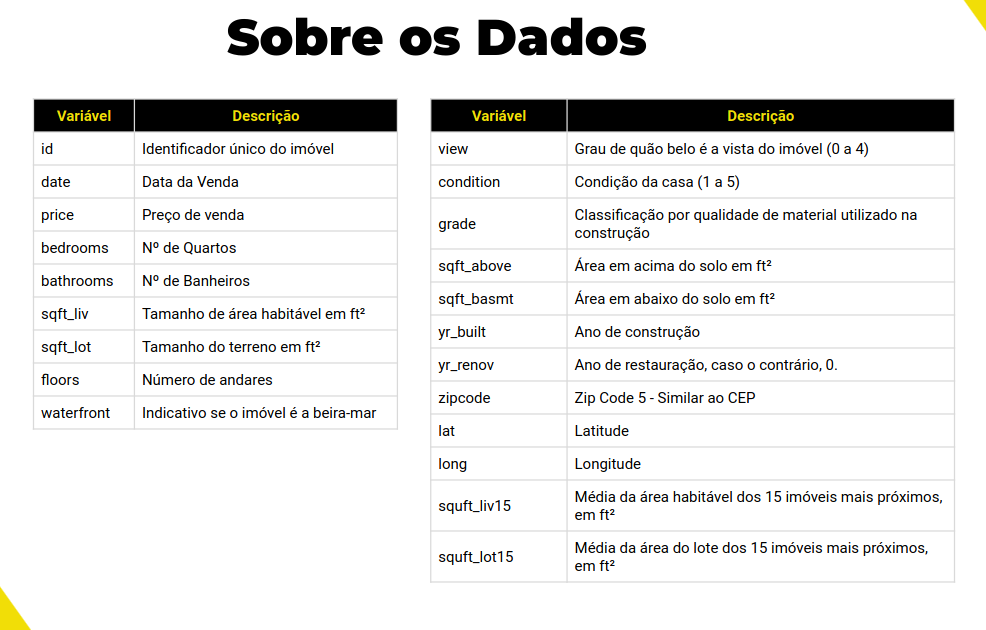

In [ ]:
df = pd.read_csv('/content/sample_data/kc_house_data.csv')

In [ ]:
# Verificar a consistência dos dados do DataSet:
# 1 - Ver se ha valores nulos
if df.isna().any().any():
  print("Existem valores nulos no dataset")
else:
  print("Nao Existem valores nulos no dataset")

# Procurar por outliers

Nao Existem valores nulos no dataset


In [ ]:
# convertendo alguns atributos para facilitar minha interpreta;'ao dos dados
df = df.rename(columns={
    'bedrooms':'num_quarto',
    'bathrooms':'num_banheiro',
    'condition':'condicao_casa_1_5',
    'date':'data_venda',
    'price':'preco_venda',
    'sqft_living':'t_area_habitavel',
    'sqft_lot':'tamanho_terreno',
    'floors':'qtd_andares',
    'waterfront':'imovel_beira_mar',
    'view':'grau_bela_vista',
    'grade':'qualidade_material_const',
    'sqft_above':'area_acima_solo',
    'sqft_basement':'area_baixo_solo',
    'sqft_living15':'media_area_habitavel_15_prox',
    'sqft_lot15':'media_area_terreno_15_prox',
    'yr_built':'ano_construcao',
    'yr_renovated':'ano_reforma',
})


In [ ]:
# Criei uma copia do dataframe para manter a integridade do anterior
house_data = df
house_data

,id,data_venda,preco_venda,num_quarto,num_banheiro,t_area_habitavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,...,qualidade_material_const,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habitavel_15_prox,media_area_terreno_15_prox
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Conveter a data para ficar mais legivel e poder operar com mais facilidade
house_data['data_venda'] = pd.to_datetime(house_data['data_venda']).dt.date
house_data.to_excel('/content/sample_data/house.xlsx')

In [5]:
# Trabalhando com o dataset convertido para excel
house_data = df = pd.read_excel('/content/sample_data/house.xlsx')
# Removendo a coluna 'Unnamed: 0', criada de forma arbitraria
house_data = house_data.drop('Unnamed: 0',axis=1)

In [7]:
house_aleatorio = house_data.sample(1000)

In [9]:
house_aleatorio.shape

(1000, 21)

In [6]:
# Com o describe, estou buscando os primeiros outliers
house_data.describe()

,id,preco_venda,num_quarto,num_banheiro,t_area_habitavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,condicao_casa_1_5,qualidade_material_const,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habitavel_15_prox,media_area_terreno_15_prox
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
''' 
  Procurar Imóveis:
    1 - com vistar para mar
    2 - com bela paisagem - 3 ou 4
    3 - Menor preço - entre 250000 e 1500000
    4 - Maior quantidade de quartos - entre 2 e 4 
    5 - maior quantidade de banheiro entr 1 e 3
    6 - Maior área habitável
    7 - Ano de Construção - preferência acima de 1980 se atender as outras condições
    8 - Ano de Restauração* - Não é muito importante
    9 - Quantidade de andares - entr 1 e 8
    10- Estado de conservação - entre 3 e 5
    11- Maior Avaliação de Material de construção - entre 10 e 13

    Desta forma devo selecionar as principais colunas que devo buscar respostas
    para as minhas perguntas:
    Quais os imoveis mas conservados, com quantidade comoda de quartos e basn
    heiros
    com bela vista e proximo ao mar que representa o melhor custo beneficio?

'''

<ipython-input-92-959f9e866be1>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



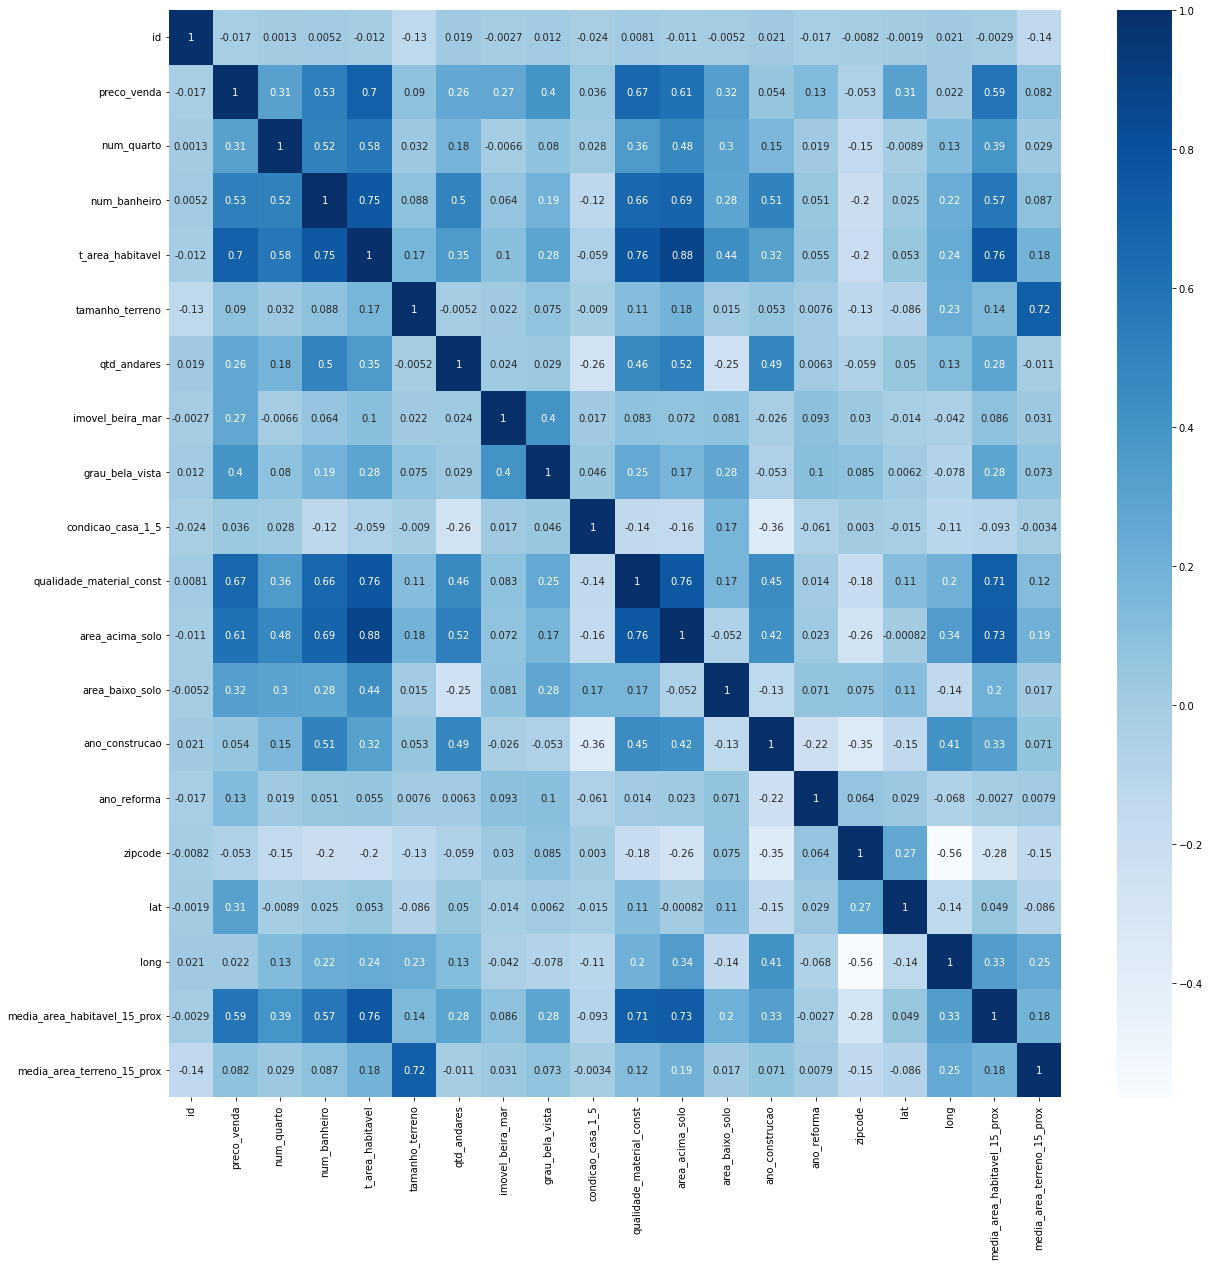

In [ ]:
# Buscando as principais correlações de variáveis que afetam o preço
plt.figure(figsize=(20,20))
correlacao = sns.heatmap(house_data.corr(),annot=True, cmap='Blues');


Existe uma boa realação entre:

*   preço de venda e a qualidade do material utilizado
*   preço de venda e numero de banheiro
*   preço de venda e tamanho de área habitável
*   preço de venda e quantidade de quartos apresenta uma relação menor. - vou testar com o boxplot esta variável
*   achei importante entender que não existe uma relação direta entre tamanho    do terreno e o preço
*   Existem outras realações, mas não interessa para uma análise imediata do problema





In [ ]:
# O Mapa de Calor me dará uma noção da área de maior concentração de imóveis
# com custos dentro da faixa buscada, dando uma visão melhor para 
# filtrar os dados desejados. O mapa exibe o zipcode, com este filtro a região.
mapa_calor = px.density_mapbox(house_data, lat='lat', lon='long', z='preco_venda', radius=10,
                               center=dict(lat=47.5, lon=-122.3), zoom=9,
                               hover_name='zipcode', mapbox_style='carto-positron',
                               title='Mapa de calor de preços de imóveis no condado de King')
mapa_calor.show()

In [ ]:
agrupa_house = house_data.groupby([
   'preco_venda','qualidade_material_const',        
    'num_banheiro','t_area_habitavel', 'media_area_habitavel_15_prox'            
    
], sort=False).apply(lambda x: x.sort_values(['preco_venda'], ascending=False))

In [ ]:
agrupa_house.describe()

,id,preco_venda,num_quarto,num_banheiro,t_area_habitavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,condicao_casa_1_5,qualidade_material_const,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habitavel_15_prox,media_area_terreno_15_prox
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
gboxplot = px.box(agrupa_house,x='num_quarto', y='preco_venda',hover_name='num_banheiro')
gboxplot.show()

Neste Gráfico de caixas fica claro que realmente não há uma relação direta entre preço de venda e quantidade de quartos. Há muita discrepância nestas duas variáveis. Tem casas com grande numero de quartos mais baratas do que outras que possuem um número bem menor. Se passar o mouse no gráfico do percerber por exemplo que tem casas com 3 quartos com valor mínimo de 82k e mãximo de 955k.
Desta forma percebo que outras variáveis afetam este conjunto, e por isso estou construindo filtros com estas váriáveis: 

*   Qualidade do Material usado na construção
*   Número de Banheiros
*   Quantidade de andar
*   Proximidade com praias (Mar)
*   Bo vista da casa
*   Tamanho da área habitável
*   Média de àrea habitável dos 15 imóveis mais próximos








In [ ]:
novo_house = pd.DataFrame(agrupa_house)

In [ ]:
# 98116 - zipcode de Alki Beach   - Somente para teste, remover mais tarde
# 98034 - zipcode de uanita Beach Park
imovel_praia = novo_house[((novo_house.zipcode==98116) | (novo_house.zipcode==98034))  & (novo_house.imovel_beira_mar == 1)]
imovel_praia.groupby('qualidade_material_const').size().reset_index(name='Qtd_Imovel')

,qualidade_material_const,Qtd_Imovel
0,8,3
1,10,2
2,11,1
3,12,1


In [ ]:
px.bar(imovel_praia, x='qualidade_material_const', y='preco_venda', color='condicao_casa_1_5')

In [ ]:
house_filter = novo_house[
    (novo_house.media_area_habitavel_15_prox < 3000) & 
    (novo_house.qualidade_material_const > 9) &
    (novo_house.t_area_habitavel < 3000) & 
    (novo_house.num_banheiro > 1) &
    (novo_house.condicao_casa_1_5 > 3) &
    (novo_house.preco_venda < 2000000) &
    (novo_house.grau_bela_vista > 2)    

  ]
house_filter.head()



,id,data_venda,preco_venda,num_quarto,num_banheiro,t_area_habitavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,...,qualidade_material_const,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habitavel_15_prox,media_area_terreno_15_prox
2179,3343301920,2015-03-02,1650000,3,2.75,2690,8890,2.0,1,4,...,10,2690,0,1975,1991,98006,47.5487,-122.197,2940,8890
7203,2927600630,2015-04-16,995000,4,3.50,2780,9550,2.0,0,4,...,10,2530,250,1978,0,98166,47.4540,-122.373,2724,10634
9935,2818100060,2014-05-20,1275000,4,2.00,2850,7861,1.0,0,4,...,10,1450,1400,1970,0,98117,47.6995,-122.397,2810,8087
10098,868002015,2015-02-25,1326000,3,2.25,2960,8330,1.0,0,3,...,10,2260,700,1953,0,98177,47.7035,-122.385,2960,8840
13163,9322800230,2014-12-12,1250000,4,2.50,2960,20240,2.0,0,4,...,10,2960,0,1985,0,98146,47.5075,-122.389,2500,14960


In [ ]:
# Analisando preços com Histograma
histograma = px.histogram(house_data,x='ano_construcao', y='preco_venda',
                          title='Histograma de precos de Imoveis no Condado de Kings')
histograma.show()

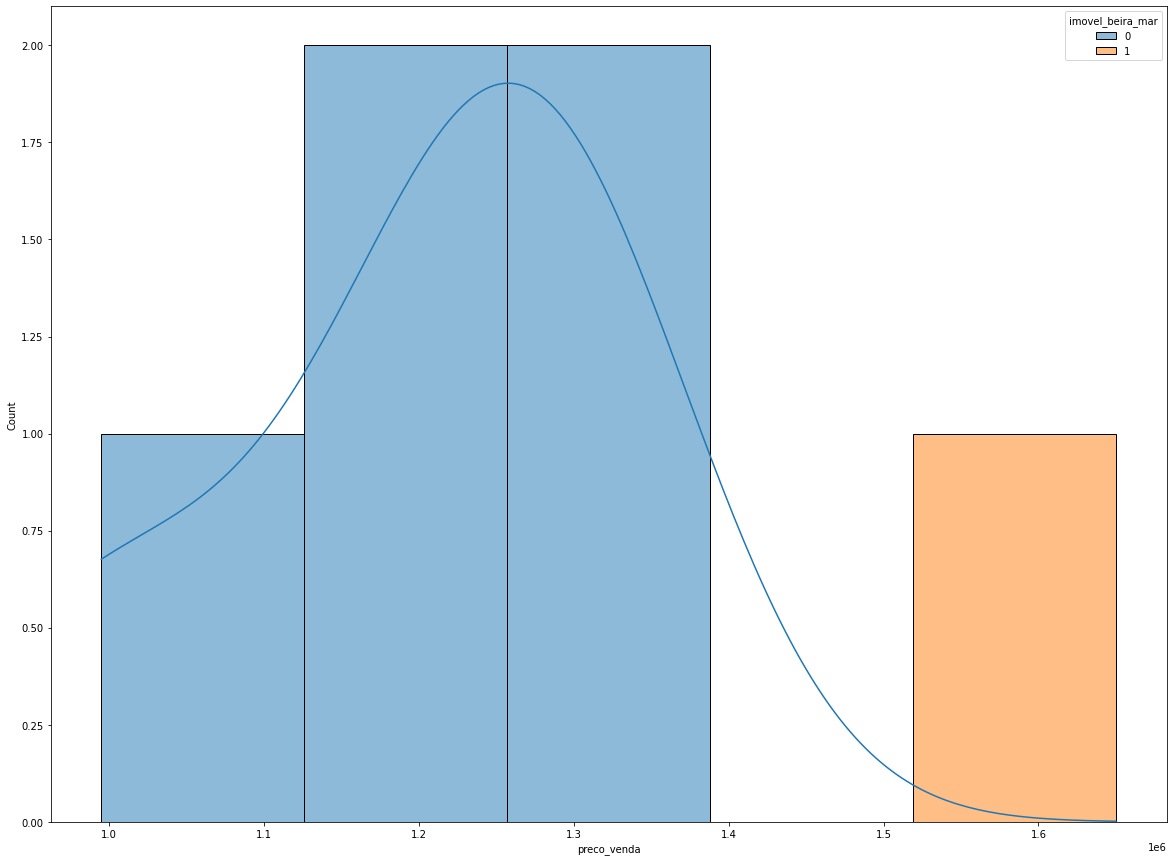

In [ ]:
fig = plt.figure(figsize=(20,15))
ghistograma = sns.histplot(data=house_filter,hue='imovel_beira_mar', x='preco_venda', kde=True)
fig.show()

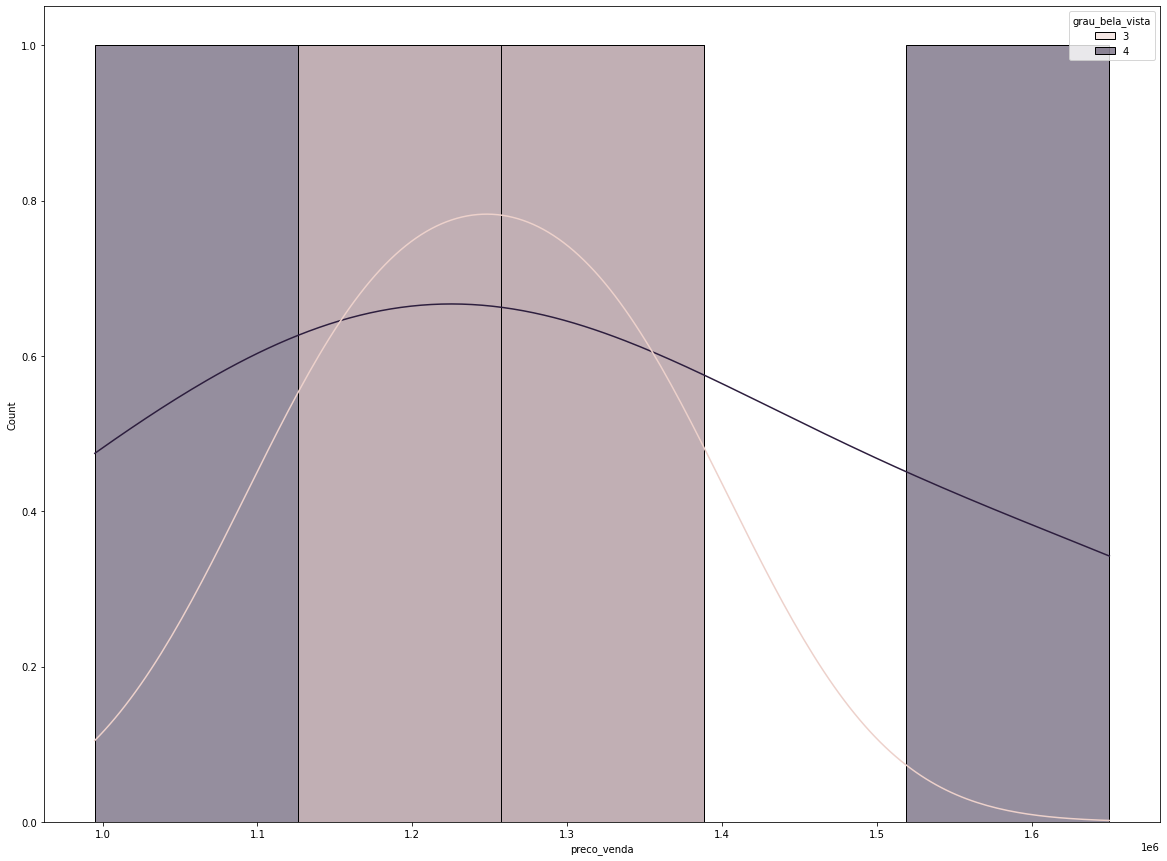

In [ ]:
fig = plt.figure(figsize=(20,15))
ghistograma = sns.histplot(data=house_filter,hue='grau_bela_vista', x='preco_venda', kde=True)
fig.show()

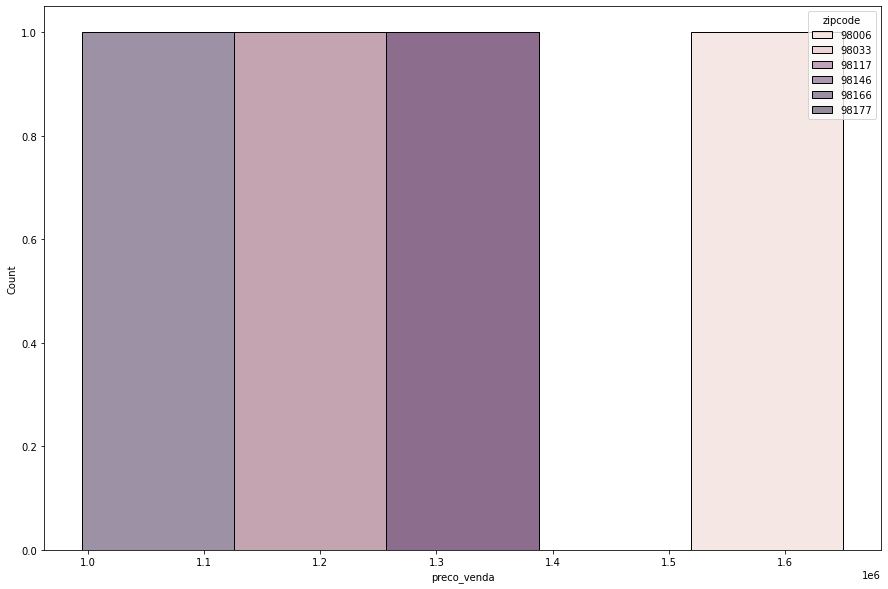

In [ ]:
fig = plt.figure(figsize=(15,10))
ghistograma = sns.histplot(data=house_filter,hue='zipcode', x='preco_venda', kde=True)
fig.show()

In [ ]:
house_filter.describe()

,id,preco_venda,num_quarto,num_banheiro,t_area_habtavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,condicao_casa_1_5,qualidade_material_const,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habtavel_15_prox,media_area_terreno_15_prox
count,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000
mean,3.897384e+09,1.277667e+06,3.500000,2.625000,2855.000000,11166.833333,1.666667,0.166667,3.666667,4.166667,10.0,2453.333333,401.666667,1974.666667,331.833333,98107.500000,47.593950,-122.32400,2724.833333,10491.500000
std,2.865922e+09,2.159784e+05,0.547723,0.518411,105.971694,4690.934253,0.516398,0.408248,0.516398,0.408248,0.0,548.549603,556.432086,12.339638,812.822346,71.662403,0.105306,0.09638,226.009218,2536.014018
min,8.680020e+08,9.950000e+05,3.000000,2.000000,2690.000000,7861.000000,1.000000,0.000000,3.000000,4.000000,10.0,1450.000000,0.000000,1953.000000,0.000000,98006.000000,47.454000,-122.39700,2415.000000,8087.000000
25%,2.845475e+09,1.190000e+06,3.000000,2.312500,2797.500000,8470.000000,1.250000,0.000000,3.250000,4.000000,10.0,2327.500000,15.000000,1971.250000,0.000000,98054.000000,47.517800,-122.38800,2556.000000,8852.500000
50%,3.135451e+09,1.262500e+06,3.500000,2.625000,2870.000000,9220.000000,2.000000,0.000000,4.000000,4.000000,10.0,2610.000000,155.000000,1976.500000,0.000000,98131.500000,47.599600,-122.37900,2767.000000,9762.000000
75%,3.914201e+09,1.313250e+06,4.000000,2.750000,2942.500000,11485.000000,2.000000,0.000000,4.000000,4.000000,10.0,2795.000000,587.500000,1983.250000,0.000000,98161.000000,47.687250,-122.24550,2907.500000,11312.000000
max,9.322800e+09,1.650000e+06,4.000000,3.500000,2960.000000,20240.000000,2.000000,1.000000,4.000000,5.000000,10.0,2960.000000,1400.000000,1987.000000,1991.000000,98177.000000,47.703500,-122.19700,2960.000000,14960.000000


In [ ]:
# Criar grafico de dispersao para verificar a relacao entre preco e tamanho do imove e suas tendencias
gdispersao = px.scatter(house_filter, x='t_area_habtavel', 
                        y='preco_venda',color='zipcode', hover_name='grau_bela_vista',
                        title='Preco por Tamanho do imovel', log_y=True)

In [ ]:
gdispersao.show()

In [ ]:
# Devido a um ponto fora da curva, no gráfico de dispersão entendi que poderia
# se tratar de uma grande oportunidade, mas busco verificar se não teria sido erro de digitação
house_teste = house_data[(house_data.t_area_habtavel==13540) & (house_data.qualidade_material_const > 10)]
house_teste

,id,data_venda,preco_venda,num_quarto,num_banheiro,t_area_habtavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,...,qualidade_material_const,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habtavel_15_prox,media_area_terreno_15_prox
12777,1225069038,2014-05-05,2280000,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [ ]:
contagem = house_filter.groupby('zipcode').size().reset_index(name='contagem')

In [ ]:
gbarras = px.bar(contagem, x='zipcode', y='contagem', title='Numero de imoveis a venda, no condado de KIngs por area(zipcode)')
gbarras.show()

In [ ]:
df = house_filter
gboxplot = px.box(df, x='num_quarto', y='preco_venda')
gboxplot.show()

In [ ]:
house_filter

,id,data_venda,preco_venda,num_quarto,num_banheiro,t_area_habtavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,...,qualidade_material_const,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habtavel_15_prox,media_area_terreno_15_prox
15,9297300055,2015-01-24,650000,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,2014-08-26,2000000,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
49,822039084,2015-03-11,1350000,3,2.50,2753,65005,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
58,7922800400,2014-08-27,951000,5,3.25,3250,14342,2.0,0,4,...,8,3250,0,1968,0,98008,47.5880,-122.116,2960,11044
60,1516000055,2014-12-10,650000,3,2.25,2150,21235,1.0,0,3,...,8,1590,560,1959,0,98166,47.4336,-122.339,2570,18900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21554,2855000110,2014-08-08,388000,3,2.50,2198,6222,2.0,0,2,...,8,2198,0,2010,0,98198,47.3906,-122.304,2198,7621
21576,9253900271,2015-01-07,3567000,5,4.50,4850,10584,2.0,1,4,...,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270
21579,7011201004,2014-05-29,645000,3,3.25,1730,1229,2.0,0,2,...,9,1320,410,2008,0,98119,47.6374,-122.369,1710,1686
21593,8672200110,2015-03-17,1088000,5,3.75,4170,8142,2.0,0,2,...,10,4170,0,2006,0,98056,47.5354,-122.181,3030,7980


In [ ]:
fig = px.scatter_mapbox(house_filter, lat="lat", lon="long", hover_name='preco_venda', zoom=4)
fig.update_layout(mapbox_style="open-street-map")
fig.show()